In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import scipy.stats as st
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans

import statsmodels.api as sm

from sklearn import preprocessing, decomposition

#On importe le fichier contenant les fonctions (PSanté_03_notebookfunctions.py)
from PSanté_03_notebookfunctions import *

In [2]:
#on charge le dataframe depuis un format pickle ce qui est plus rapide
products_optimized = pd.read_pickle("products_optimized")
products_optimized.notnull().sum()

code                  325973
created_datetime      325973
product_name          325056
countries             325973
main_categories       325973
categories            325973
nutriscore_score      325973
nutriscore_grade      325973
energy-kj_100g        325973
sugars_100g           325973
saturated-fat_100g    325973
sodium_100g           325973
fiber_100g            325973
proteins_100g         325973
dtype: int64


# -----------------------------------------------
# 1- Analyse Univariée Nutri score

In [3]:
print("La moyenne du Nutriscore est ", round(products_optimized["nutriscore_score"].mean(),2))
print("La mediane du Nutriscore est ", round(products_optimized["nutriscore_score"].median(),2))
print("Le mode du Nutriscore est ", round(products_optimized["nutriscore_score"].mode()[0],2))
print("-----------------------------------------------------")
print("La variance du Nutriscore est ", round(products_optimized["nutriscore_score"].var(),2))
print("L'écart-type du Nutriscore est ", round(products_optimized["nutriscore_score"].std(),2))
print("-----------------------------------------------------")
print("Le Skewness empirique du Nutriscore est", round(products_optimized["nutriscore_score"].skew(),2))
print("Le Kurtosis empirique du Nutriscore est", round(products_optimized["nutriscore_score"].kurtosis(),2))

La moyenne du Nutriscore est  7.31
La mediane du Nutriscore est  7.0
Le mode du Nutriscore est  0.0
-----------------------------------------------------
La variance du Nutriscore est  78.02
L'écart-type du Nutriscore est  8.83
-----------------------------------------------------
Le Skewness empirique du Nutriscore est 0.19
Le Kurtosis empirique du Nutriscore est -0.96


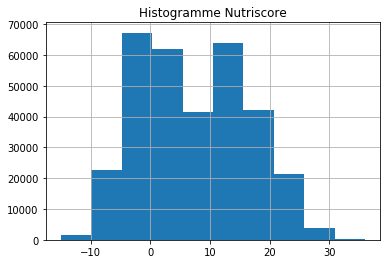

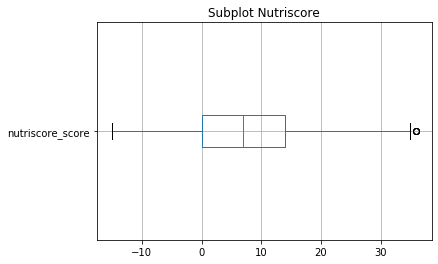

In [4]:
#On trace l'histogramme
products_optimized["nutriscore_score"].hist()
plt.title("Histogramme Nutriscore")
plt.show()
#On trace la boite à moustaches
products_optimized.boxplot(column="nutriscore_score", vert=False)
plt.title("Subplot Nutriscore")
plt.show()

# -----------------------------------------------
# 2- Analyse Univariée Energie (en Kj pour 100g)

In [5]:
print("La moyenne de l'Energie est ", round(products_optimized["energy-kj_100g"].mean(),2))
print("La mediane de l'Energie est ", round(products_optimized["energy-kj_100g"].median(),2))
print("Le mode de l'Energie est ", round(products_optimized["energy-kj_100g"].mode()[0],2))
print("-----------------------------------------------------")
print("La variance de l'Energie est ", round(products_optimized["energy-kj_100g"].var(),2))
print("L'écart-type de l'Energie est ", round(products_optimized["energy-kj_100g"].std(),2))
print("-----------------------------------------------------")
print("Le Skewness empirique de l'Energie est", round(products_optimized["energy-kj_100g"].skew(),2))
print("Le Kurtosis empirique de l'Energie est", round(products_optimized["energy-kj_100g"].kurtosis(),2))

La moyenne de l'Energie est  1051.55
La mediane de l'Energie est  1000.0
Le mode de l'Energie est  2000.0
-----------------------------------------------------
La variance de l'Energie est  484860.58
L'écart-type de l'Energie est  696.32
-----------------------------------------------------
Le Skewness empirique de l'Energie est 0.28
Le Kurtosis empirique de l'Energie est -1.02


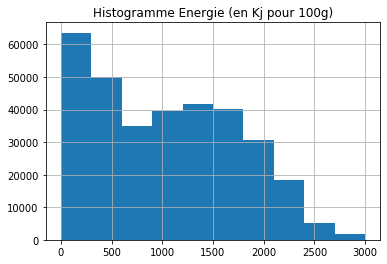

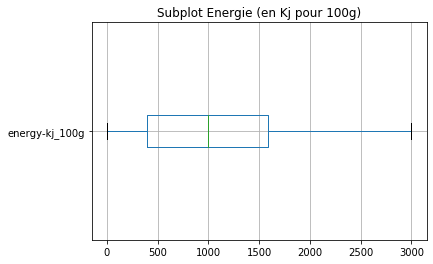

In [6]:
#On trace l'histogramme
products_optimized["energy-kj_100g"].hist()
plt.title("Histogramme Energie (en Kj pour 100g)")
plt.show()
#On trace la boite à moustaches
products_optimized.boxplot(column="energy-kj_100g", vert=False)
plt.title("Subplot Energie (en Kj pour 100g)")
plt.show()

# -----------------------------------------------
# 3- Analyse Univariée Sucre pour 100g

In [7]:
print("La moyenne de Sucre est ",  round(products_optimized["sugars_100g"].mean(),2))
print("La mediane de Sucre est ",  round(products_optimized["sugars_100g"].median(),2))
print("Le mode de Sucre est ",  round(products_optimized["sugars_100g"].mode()[0],2))
print("-----------------------------------------------------")
print("La variance de Sucre est ",  round(products_optimized["sugars_100g"].var(),2))
print("L'écart-type de Sucre est ",  round(products_optimized["sugars_100g"].std(),2))
print("-----------------------------------------------------")
print("Le Skewness  empirique de Sucre est", round(products_optimized["sugars_100g"].skew(),2))
print("Le Kurtosis empirique de Sucre est",  round(products_optimized["sugars_100g"].kurtosis(),2))

La moyenne de Sucre est  10.5
La mediane de Sucre est  4.23
Le mode de Sucre est  0.0
-----------------------------------------------------
La variance de Sucre est  165.75
L'écart-type de Sucre est  12.87
-----------------------------------------------------
Le Skewness  empirique de Sucre est 1.41
Le Kurtosis empirique de Sucre est 0.95


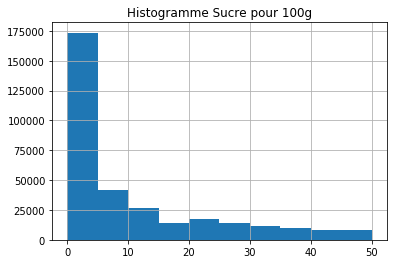

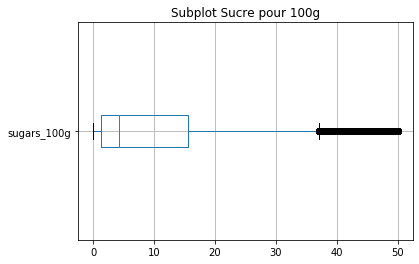

In [8]:
#On trace l'histogramme
products_optimized["sugars_100g"].hist()
plt.title("Histogramme Sucre pour 100g")
plt.show()
#On trace la boite à moustaches
products_optimized.boxplot(column="sugars_100g", vert=False)
plt.title("Subplot Sucre pour 100g")
plt.show()

# -----------------------------------------------
# 4- Analyse Univariée Acides gras saturés pour 100g

In [9]:
print("La moyenne de Acides gras saturés est ", round(products_optimized["saturated-fat_100g"].mean(),2))
print("La mediane de Acides gras saturés est ", round(products_optimized["saturated-fat_100g"].median(),2))
print("Le mode de Acides gras saturés est ", round(products_optimized["saturated-fat_100g"].mode()[0],2))
print("-----------------------------------------------------")
print("La variance de Acides gras saturés est ", round(products_optimized["saturated-fat_100g"].var(),2))
print("L'écart-type de Acides gras saturés est ", round(products_optimized["saturated-fat_100g"].std(),2))
print("-----------------------------------------------------")
print("Le Skewness empirique de Acides gras saturés est", round(products_optimized["saturated-fat_100g"].skew(),2))
print("Le Kurtosis empirique de Acides gras saturés est", round(products_optimized["saturated-fat_100g"].kurtosis(),2))

La moyenne de Acides gras saturés est  3.7
La mediane de Acides gras saturés est  1.6
Le mode de Acides gras saturés est  0.0
-----------------------------------------------------
La variance de Acides gras saturés est  23.51
L'écart-type de Acides gras saturés est  4.85
-----------------------------------------------------
Le Skewness empirique de Acides gras saturés est 1.53
Le Kurtosis empirique de Acides gras saturés est 1.61


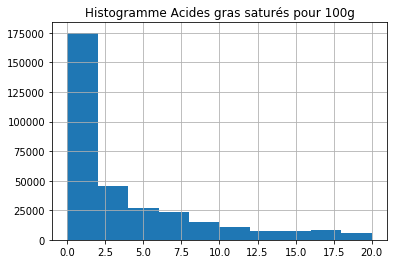

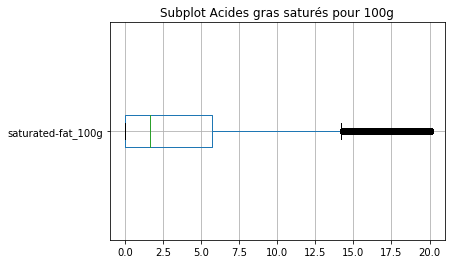

In [10]:
#On trace l'histogramme
products_optimized["saturated-fat_100g"].hist()
plt.title("Histogramme Acides gras saturés pour 100g")
plt.show()
#On trace la boite à moustaches
products_optimized.boxplot(column="saturated-fat_100g", vert=False)
plt.title("Subplot Acides gras saturés pour 100g")
plt.show()


# -----------------------------------------------
# 5- Analyse Univariée Sodium pour 100g

In [11]:
print("La moyenne de Sodium est ", round(products_optimized["sodium_100g"].mean(),2))
print("La mediane de Sodium est ", round(products_optimized["sodium_100g"].median(),2))
print("Le mode de Sodium est ", round(products_optimized["sodium_100g"].mode()[0],2))
print("-----------------------------------------------------")
print("La variance de Sodium est ", round(products_optimized["sodium_100g"].var(),2))
print("L'écart-type de Sodium est ", round(products_optimized["sodium_100g"].std(),2))
print("-----------------------------------------------------")
print("Le Skewness empirique de Sodium est", round(products_optimized["sodium_100g"].skew(),2))
print("Le Kurtosis empirique de Sodium est", round(products_optimized["sodium_100g"].kurtosis(),2))

La moyenne de Sodium est  0.4
La mediane de Sodium est  0.28
Le mode de Sodium est  0.0
-----------------------------------------------------
La variance de Sodium est  0.37
L'écart-type de Sodium est  0.61
-----------------------------------------------------
Le Skewness empirique de Sodium est 6.36
Le Kurtosis empirique de Sodium est 64.81


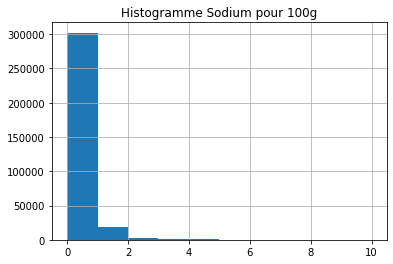

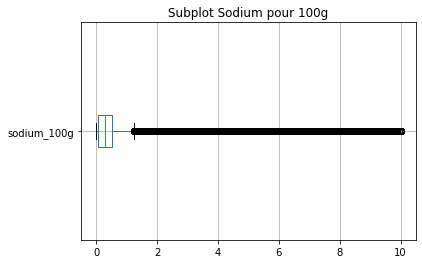

In [12]:
#On trace l'histogramme
products_optimized["sodium_100g"].hist()
plt.title("Histogramme Sodium pour 100g")
plt.show()
#On trace la boite à moustaches
products_optimized.boxplot(column="sodium_100g", vert=False)
plt.title("Subplot Sodium pour 100g")
plt.show()


# -----------------------------------------------
# 6- Analyse Univariée Fibre pour 100g

In [13]:
print("La moyenne de Fibre est ", round(products_optimized["fiber_100g"].mean(),2))
print("La mediane de Fibre est ", round(products_optimized["fiber_100g"].median(),2))
print("Le mode de Fibre est ", round(products_optimized["fiber_100g"].mode()[0],2))
print("-----------------------------------------------------")
print("La variance de Fibre est ", round(products_optimized["fiber_100g"].var(),2))
print("L'écart-type de Fibre est ", round(products_optimized["fiber_100g"].std(),2))
print("-----------------------------------------------------")
print("Le Skewness empirique de Fibre est", round(products_optimized["fiber_100g"].skew(),2))
print("Le Kurtosis empirique de Fibre est", round(products_optimized["fiber_100g"].kurtosis(),2))

La moyenne de Fibre est  2.9
La mediane de Fibre est  1.6
Le mode de Fibre est  0.0
-----------------------------------------------------
La variance de Fibre est  18.31
L'écart-type de Fibre est  4.28
-----------------------------------------------------
Le Skewness empirique de Fibre est 3.79
Le Kurtosis empirique de Fibre est 23.55


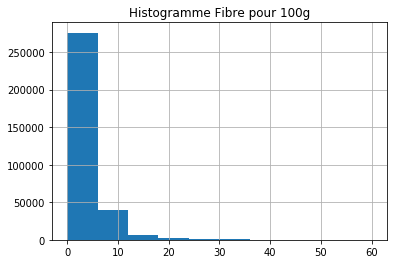

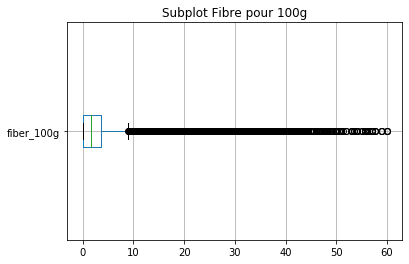

In [14]:
#On trace l'histogramme
products_optimized["fiber_100g"].hist()
plt.title("Histogramme Fibre pour 100g")
plt.show()
#On trace la boite à moustaches
products_optimized.boxplot(column="fiber_100g", vert=False)
plt.title("Subplot Fibre pour 100g")
plt.show()


# -----------------------------------------------
# 7- Analyse Univariée Protéine pour 100g

In [15]:
print("La moyenne de Protéine est ", round(products_optimized["proteins_100g"].mean(),2))
print("La mediane de Protéine est ", round(products_optimized["proteins_100g"].median(),2))
print("Le mode de Protéine est ", round(products_optimized["proteins_100g"].mode()[0],2))
print("-----------------------------------------------------")
print("La variance de Protéine est ", round(products_optimized["proteins_100g"].var(),2))
print("L'écart-type de Protéine est ", round(products_optimized["proteins_100g"].std(),2))
print("-----------------------------------------------------")
print("Le Skewness empirique de Protéine est", round(products_optimized["proteins_100g"].skew(),2))
print("Le Kurtosis empirique de Protéine est", round(products_optimized["proteins_100g"].kurtosis(),2))

La moyenne de Protéine est  8.3
La mediane de Protéine est  6.3
Le mode de Protéine est  0.0
-----------------------------------------------------
La variance de Protéine est  69.33
L'écart-type de Protéine est  8.33
-----------------------------------------------------
Le Skewness empirique de Protéine est 2.23
Le Kurtosis empirique de Protéine est 9.55


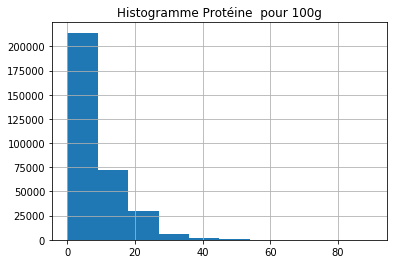

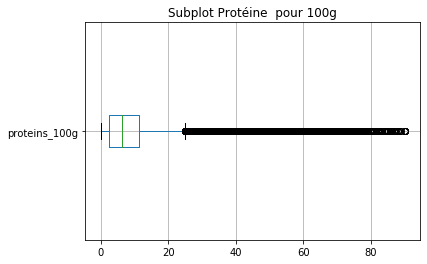

In [16]:
#On trace l'histogramme
products_optimized["proteins_100g"].hist()
plt.title("Histogramme Protéine  pour 100g")
plt.show()
#On trace la boite à moustaches
products_optimized.boxplot(column="proteins_100g", vert=False)
plt.title("Subplot Protéine  pour 100g")
plt.show()

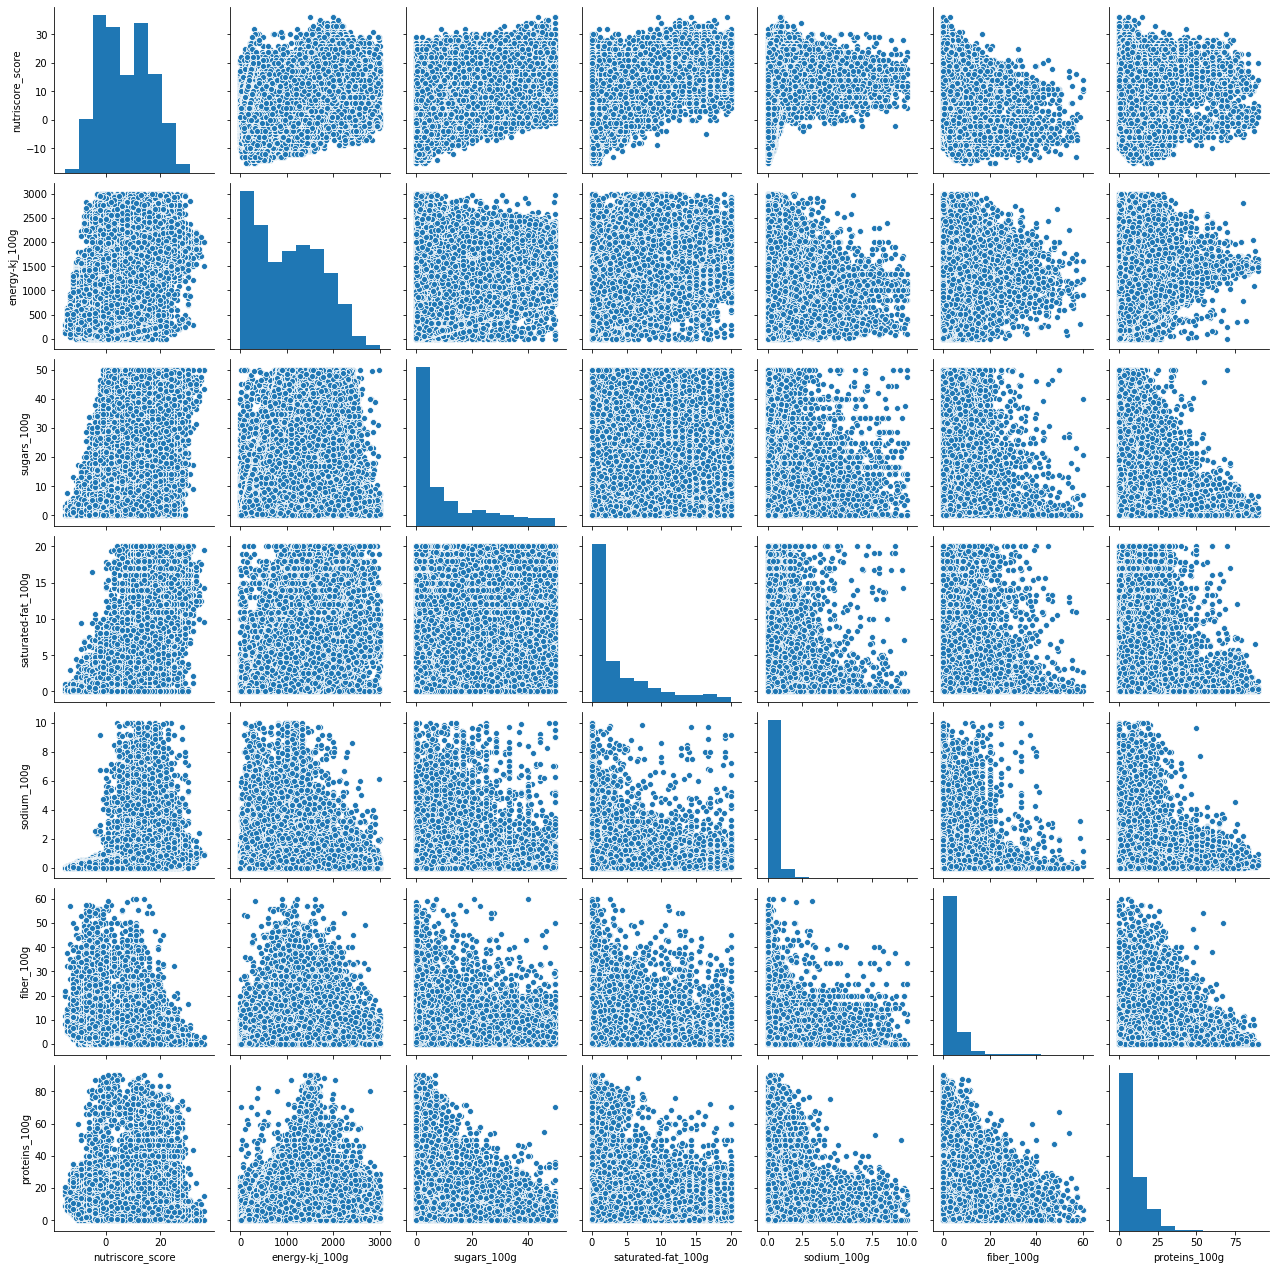

In [17]:
#On trace les graph pour voir les relations entre nos différentes variables
df = products_optimized[['nutriscore_grade','nutriscore_score', 'energy-kj_100g', 'sugars_100g'
               , 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'proteins_100g']]
sns.axes_style(style="ticks")
sns.pairplot(df)

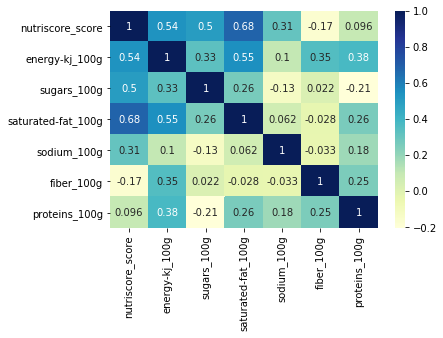

In [18]:
# On trace notre matrice de corrélation
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [19]:
#On utilisera cette fonction pour faire un test statistique ANOVA afin de determiner s'il y a vraiment corrélation
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    

# -----------------------------------------------
# 1a - Analyse Bivariée Nutriscore / Acides gras saturés
#### Quantitatif / Quantitatif - Méthode régression linéaire

In [20]:
print("La covariance est", round(np.cov(products_optimized["nutriscore_score"]
                                  , products_optimized["saturated-fat_100g"], ddof=0)[1,0],2))
pears,pvalue = st.pearsonr(products_optimized["nutriscore_score"], products_optimized["saturated-fat_100g"])
print("Le coefficient de corrélation linéaire est", round(pears,2)," et la p valeur est de ", pvalue)

Y = products_optimized['nutriscore_score']
X = products_optimized[['saturated-fat_100g']]
# On modifiera X, on en crée donc une copie
X = X.copy()
X['intercept'] = 1.

# OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
result = sm.OLS(Y, X).fit()
#On calcule les coefficients de la régression linéaire
a,b = result.params['saturated-fat_100g'],result.params['intercept']

La covariance est 29.27
Le coefficient de corrélation linéaire est 0.68  et la p valeur est de  0.0


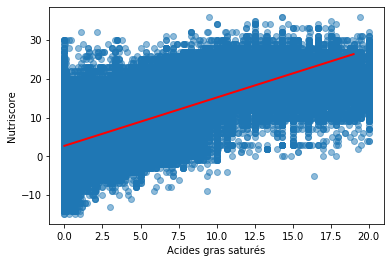

In [21]:
plt.plot(products_optimized["saturated-fat_100g"], products_optimized["nutriscore_score"], "o", alpha=0.5)
plt.xlabel("Acides gras saturés")
plt.ylabel("Nutriscore")

#On effectue la régression linéaire
x = np.arange(int(max(products_optimized['saturated-fat_100g'])))
y = [a*x+b for x in range(int(max(products_optimized['saturated-fat_100g'])))]
plt.plot(x,y, "r", alpha=1, linewidth=2)
plt.show()

# -----------------------------------------------
# 1b - Analyse Bivariée Nutrigrade /  Acides gras saturés
#### Quantitatif / Qualitatif - Méthode ANOVA

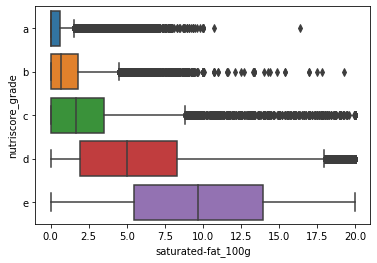

In [22]:
#On trace les boites à moustaches 
sns.boxplot(x="saturated-fat_100g",y="nutriscore_grade",data=df,order=["a", "b","c","d","e"])

In [23]:
#Faire un test statistique ANOVA pour determiner si il y a vraiment corrélation
X = "nutriscore_grade" # qualitative
Y = "saturated-fat_100g" # quantitative

print("La valeur eta carré est de ", round(eta_squared(products_optimized[X],products_optimized[Y]),2))

La valeur eta carré est de  0.4


# -----------------------------------------------
# 2a - Analyse Bivariée Nutriscore / Energie
#### Quantitatif / Quantitatif - Méthode régression linéaire

In [24]:
print("La covariance est", round(np.cov(products_optimized["nutriscore_score"]
                                  , products_optimized["energy-kj_100g"], ddof=0)[1,0],2))
pears,pvalue = st.pearsonr(products_optimized["nutriscore_score"], products_optimized["energy-kj_100g"])
print("Le coefficient de corrélation linéaire est", round(pears,2)," et la p valeur est de ", pvalue)

Y = products_optimized['nutriscore_score']
X = products_optimized[['energy-kj_100g']]
# On modifiera X, on en crée donc une copie
X = X.copy()
X['intercept'] = 1.

# OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
result = sm.OLS(Y, X).fit()
#On calcule les coefficients de la régression linéaire
a,b = result.params['energy-kj_100g'],result.params['intercept']

La covariance est 3318.99
Le coefficient de corrélation linéaire est 0.54  et la p valeur est de  0.0


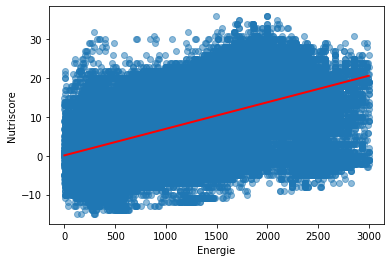

In [25]:
plt.plot(products_optimized["energy-kj_100g"],products_optimized["nutriscore_score"], "o", alpha=0.5)
plt.xlabel("Energie")
plt.ylabel("Nutriscore")

#On effectue la régression linéaire
x = np.arange(int(max(products_optimized['energy-kj_100g'])))
y = [a*x+b for x in range(int(max(products_optimized['energy-kj_100g'])))]
plt.plot(x,y, "r", alpha=1,linewidth=2)
plt.show()

# -----------------------------------------------
# 2b - Analyse Bivariée Nutrigrade / Energie
#### Quantitatif / Qualitatif - Méthode ANOVA

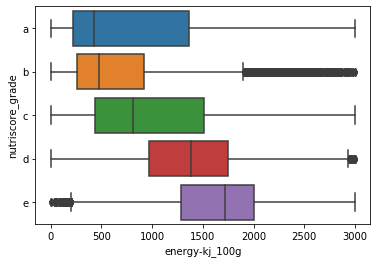

In [26]:
#On trace les boites à moustaches 
sns.boxplot(x="energy-kj_100g",y="nutriscore_grade",data=df,order=["a", "b","c","d","e"])

In [27]:
#Faire un test statistique ANOVA pour determiner si il y a vraiment corrélation
X = "nutriscore_grade" # qualitative
Y = "energy-kj_100g" # quantitative

print("La valeur eta carré est de ", round(eta_squared(products_optimized[X],products_optimized[Y]),2))

La valeur eta carré est de  0.22


# -----------------------------------------------
# 3a - Analyse Bivariée Nutriscore / Sucre
#### Quantitatif / Quantitatif - Méthode régression linéaire

In [28]:
print("La covariance est", round(np.cov(products_optimized["nutriscore_score"]
                                  , products_optimized["sugars_100g"], ddof=0)[1,0],2))
pears,pvalue = st.pearsonr(products_optimized["nutriscore_score"], products_optimized["sugars_100g"])
print("Le coefficient de corrélation linéaire est", round(pears,2)," et la p valeur est de ", pvalue)

Y = products_optimized['nutriscore_score']
X = products_optimized[['sugars_100g']]
# On modifiera X, on en crée donc une copie
X = X.copy()
X['intercept'] = 1.

# OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
result = sm.OLS(Y, X).fit()
#On calcule les coefficients de la régression linéaire
a,b = result.params['sugars_100g'],result.params['intercept']

La covariance est 57.14
Le coefficient de corrélation linéaire est 0.5  et la p valeur est de  0.0


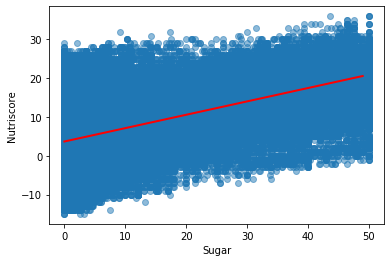

In [29]:
plt.plot(products_optimized["sugars_100g"],products_optimized["nutriscore_score"], "o", alpha=0.5)
plt.xlabel("Sugar")
plt.ylabel("Nutriscore")

#On effectue la régression linéaire
x = np.arange(int(max(products_optimized['sugars_100g'])))
y = [a*x+b for x in range(int(max(products_optimized['sugars_100g'])))]
plt.plot(x,y, "r", alpha=1,linewidth=2)
plt.show()

# -----------------------------------------------
# 3b - Analyse Bivariée Nutrigrade / Sucre
#### Quantitatif / Qualitatif - Méthode ANOVA

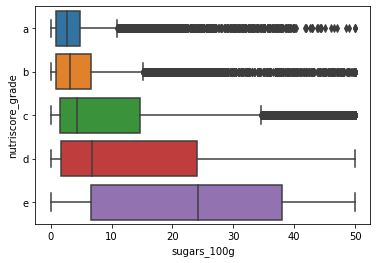

In [30]:
#On trace les boites à moustaches 
sns.boxplot(x="sugars_100g",y="nutriscore_grade",data=df,order=["a", "b","c","d","e"])

In [31]:
#Faire un test statistique ANOVA pour determiner si il y a vraiment corrélation
X = "nutriscore_grade" # qualitative
Y = "sugars_100g" # quantitative

print("La valeur eta carré est de ", round(eta_squared(products_optimized[X],products_optimized[Y]),3))

La valeur eta carré est de  0.226


# -----------------------------------------------
# 4a - Analyse Bivariée Nutriscore / Sodium
#### Quantitatif / Quantitatif - Méthode régression linéaire

In [32]:
print("La covariance est", round(np.cov(products_optimized["nutriscore_score"]
                                  , products_optimized["sodium_100g"], ddof=0)[1,0],2))
pears,pvalue = st.pearsonr(products_optimized["nutriscore_score"], products_optimized["sodium_100g"])
print("Le coefficient de corrélation linéaire est", round(pears,2)," et la p valeur est de ", pvalue)

Y = products_optimized['nutriscore_score']
X = products_optimized[['sodium_100g']]
# On modifiera X, on en crée donc une copie
X = X.copy()
X['intercept'] = 1.

# OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
result = sm.OLS(Y, X).fit()
#On calcule les coefficients de la régression linéaire
a,b = result.params['sodium_100g'],result.params['intercept']

La covariance est 1.67
Le coefficient de corrélation linéaire est 0.31  et la p valeur est de  0.0


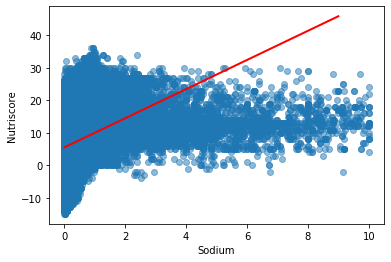

In [33]:
plt.plot(products_optimized["sodium_100g"],products_optimized["nutriscore_score"], "o", alpha=0.5)
plt.xlabel("Sodium")
plt.ylabel("Nutriscore")

#On effectue la régression linéaire
x = np.arange(int(max(products_optimized['sodium_100g'])))
y = [a*x+b for x in range(int(max(products_optimized['sodium_100g'])))]
plt.plot(x,y, "r", alpha=1,linewidth=2)
plt.show()

# -----------------------------------------------
# 4b - Analyse Bivariée Nutrigrade / Sodium
#### Quantitatif / Qualitatif - Méthode ANOVA

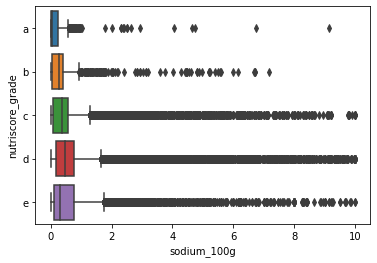

In [34]:
#On trace les boites à moustaches 
sns.boxplot(x="sodium_100g",y="nutriscore_grade",data=df,order=["a", "b","c","d","e"])

In [35]:
#Faire un test statistique ANOVA pour determiner si il y a vraiment corrélation
X = "nutriscore_grade" # qualitative
Y = "sodium_100g" # quantitative

print("La valeur eta carré est de ", round(eta_squared(products_optimized[X],products_optimized[Y]),4))

La valeur eta carré est de  0.096


# -----------------------------------------------
# 5a - Analyse Bivariée Nutriscore / Fibre
#### Quantitatif / Quantitatif - Méthode régression linéaire

In [36]:
print("La covariance est", round(np.cov(products_optimized["nutriscore_score"]
                                  , products_optimized["fiber_100g"], ddof=0)[1,0],2))
pears,pvalue = st.pearsonr(products_optimized["nutriscore_score"], products_optimized["fiber_100g"])
print("Le coefficient de corrélation linéaire est", round(pears,2)," et la p valeur est de ", pvalue)

Y = products_optimized['nutriscore_score']
X = products_optimized[['fiber_100g']]
# On modifiera X, on en crée donc une copie
X = X.copy()
X['intercept'] = 1.

# OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
result = sm.OLS(Y, X).fit()
#On calcule les coefficients de la régression linéaire
a,b = result.params['fiber_100g'],result.params['intercept']

La covariance est -6.49
Le coefficient de corrélation linéaire est -0.17  et la p valeur est de  0.0


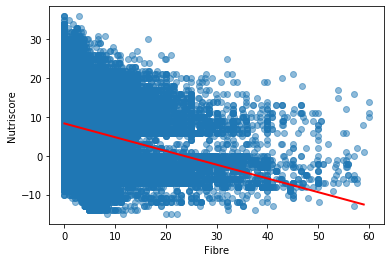

In [37]:
plt.plot(products_optimized["fiber_100g"],products_optimized["nutriscore_score"], "o", alpha=0.5)
plt.xlabel("Fibre")
plt.ylabel("Nutriscore")

#On effectue la régression linéaire
x = np.arange(int(max(products_optimized['fiber_100g'])))
y = [a*x+b for x in range(int(max(products_optimized['fiber_100g'])))]
plt.plot(x,y, "r", alpha=1,linewidth=2)
plt.show()

# -----------------------------------------------
# 5b - Analyse Bivariée Nutrigrade / Fibre
#### Quantitatif / Qualitatif - Méthode ANOVA

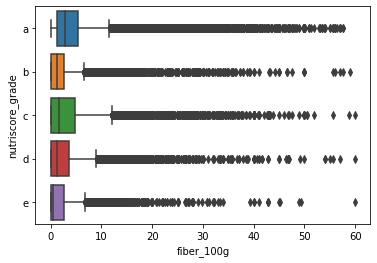

In [38]:
#On trace les boites à moustaches 
sns.boxplot(x="fiber_100g",y="nutriscore_grade",data=df,order=["a", "b","c","d","e"])

In [39]:
#Faire un test statistique ANOVA pour determiner si il y a vraiment corrélation
X = "nutriscore_grade" # qualitative
Y = "fiber_100g" # quantitative

print("La valeur eta carré est de ", round(eta_squared(products_optimized[X],products_optimized[Y]),4))

La valeur eta carré est de  0.0526


# -----------------------------------------------
# 6a - Analyse Bivariée Nutriscore / Protéines
#### Quantitatif / Quantitatif - Méthode régression linéaire

In [40]:
print("La covariance est", round(np.cov(products_optimized["nutriscore_score"]
                                  , products_optimized["proteins_100g"], ddof=0)[1,0],2))
pears,pvalue = st.pearsonr(products_optimized["nutriscore_score"], products_optimized["proteins_100g"])
print("Le coefficient de corrélation linéaire est", round(pears,2)," et la p valeur est de ", pvalue)

Y = products_optimized['nutriscore_score']
X = products_optimized[['proteins_100g']]
# On modifiera X, on en crée donc une copie
X = X.copy()
X['intercept'] = 1.

# OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
result = sm.OLS(Y, X).fit()
#On calcule les coefficients de la régression linéaire
a,b = result.params['proteins_100g'],result.params['intercept']

La covariance est 7.04
Le coefficient de corrélation linéaire est 0.1  et la p valeur est de  0.0


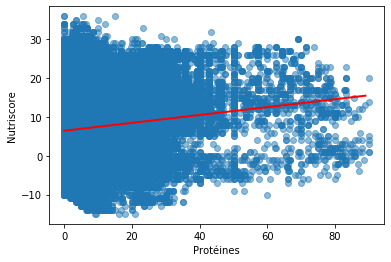

In [41]:
plt.plot(products_optimized["proteins_100g"],products_optimized["nutriscore_score"], "o", alpha=0.5)
plt.xlabel("Protéines")
plt.ylabel("Nutriscore")

#On effectue la régression linéaire
x = np.arange(int(max(products_optimized['proteins_100g'])))
y = [a*x+b for x in range(int(max(products_optimized['proteins_100g'])))]
plt.plot(x,y, "r", alpha=1,linewidth=2)
plt.show()

# -----------------------------------------------
# 6b - Analyse Bivariée Nutrigrade / Protéines
#### Quantitatif / Qualitatif - Méthode ANOVA

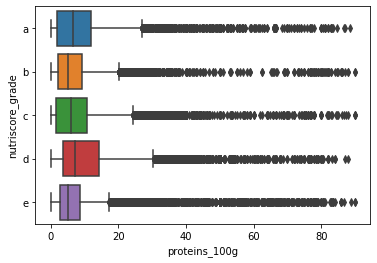

In [42]:
#On trace les boites à moustaches
sns.boxplot(x="proteins_100g",y="nutriscore_grade",data=df,order=["a", "b","c","d","e"])

In [43]:
#Faire un test statistique ANOVA pour determiner si il y a vraiment corrélation
X = "nutriscore_grade" # qualitative
Y = "proteins_100g" # quantitative

print("La valeur eta carré est de ", round(eta_squared(products_optimized[X],products_optimized[Y]),4))

La valeur eta carré est de  0.0171


# -----------------------------------------------
# Analyse en Composantes Principales

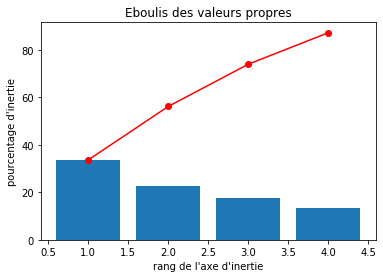

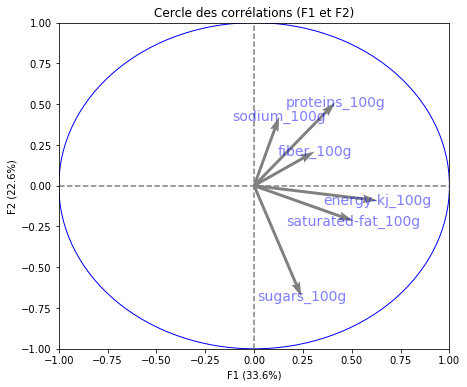

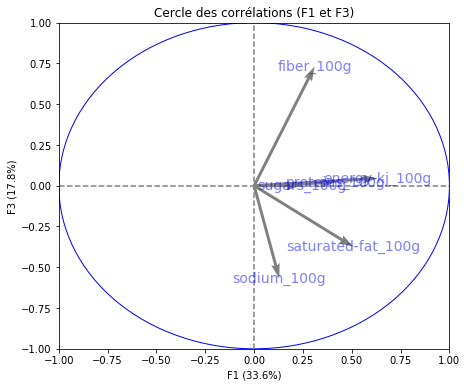

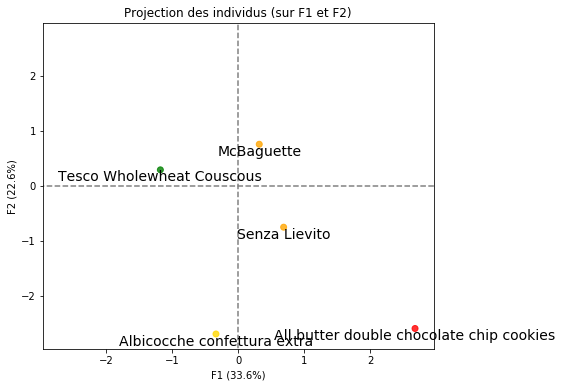

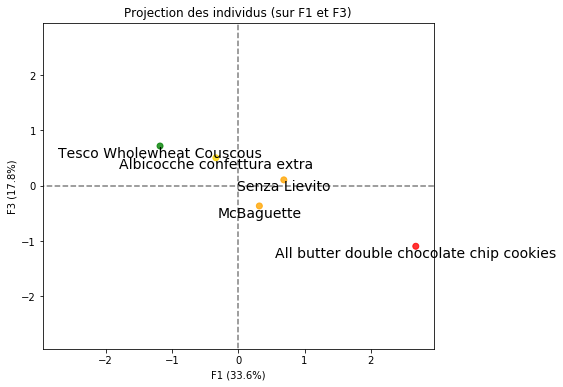

In [44]:
#On prépare notre dataframe pour notre ACP
products_pca = products_optimized[['energy-kj_100g', 'sugars_100g', 'saturated-fat_100g'
                                   , 'sodium_100g', 'fiber_100g', 'proteins_100g']]

n_comp = 4
X = products_pca.values
names = products_optimized["product_name"]
features = products_pca.columns
nutrigrade = products_optimized["nutriscore_grade"]

#Centrage est réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(0,2)], labels = np.array(features))

# Projection des individus
# 10 à 20 très bien
min_ind = 95
max_ind = 100
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2)], min_ind, max_ind, nutrigrade
                         ,labels = np.array(names[min_ind:max_ind]))
plt.show()

In [45]:
#On vérifie notre ACP avec certaines valeurs de notre jeu de données
products_optimized[products_optimized["product_name"].isin(["Pepsi mango","Bûche Pâtissière Chocolat Fève de Tonka"])]

,code,created_datetime,product_name,countries,main_categories,categories,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,sodium_100g,fiber_100g,proteins_100g
697036,3270160841981,2020-12-14 23:09:31+00:00,Bûche Pâtissière Chocolat Fève de Tonka,France,Autre,Desserts,16.0,d,1489.0,25.0,14.0,0.132,4.0,7.0
1048643,4600494697067,2020-12-11 11:49:25+00:00,Pepsi mango,Russia,Sodas,Beverages,1.0,b,0.5,0.0,0.0,0.000,0.0,0.0


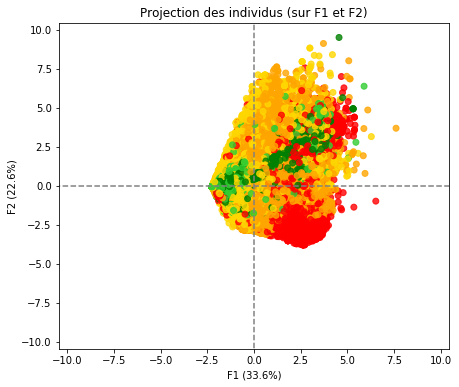

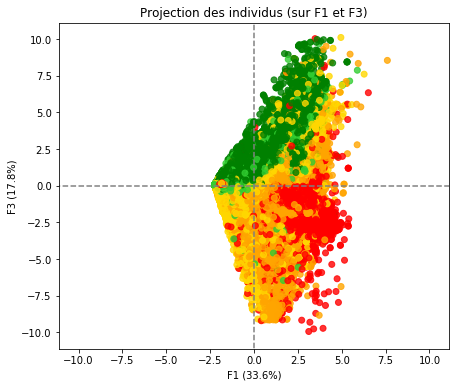

In [46]:
#On projette de nos individus sur nos deux plans factoriels
min_ind = 0
max_ind = 325973
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2)], min_ind, max_ind, nutrigrade
                         ,labels = np.array(names[min_ind:max_ind]))
plt.show()

In [ ]:
# préparation des données pour le clustering
products_snacks = products_optimized[products_optimized["categories"].isin(["Dairies"])]
products_pca = products_snacks[['energy-kj_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'fiber_100g', 'proteins_100g']]
X = products_pca.values

inertia = []
K_range = range(1,8)

#On cherche le nombre de clusters optimal
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)
    
plt.plot(K_range, inertia)

In [ ]:
# Nombre de clusters souhaités (nous choisissons 5 pour essayer de faire ressortir les 5 nutrigrade)
n_clust = 5

# Clustering par K-means
model = KMeans(n_clusters=n_clust)
#On entraine le modèle avec le jeu de données
model.fit(X)
# Récupération des clusters attribués à chaque individu
clusters = model.labels_


# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=4).fit(X)
X_projected = pca.transform(X)

In [ ]:
# préparation du produit sans nutrigrade
array_sans_nutrigrade = [[1790,42,10.8,0.452,0,30]
                         ,[153,5.2,0,0.044,0,3.6]]
products_sans_nutrigrade = pd.DataFrame(array_sans_nutrigrade, columns = products_pca.columns)
X_sans_nutrigrade = products_sans_nutrigrade.values
X_sans_nutrigrade_pca = pca.transform(X_sans_nutrigrade)

products_sans_nutrigrade

In [ ]:
#On projette nos individus sur notre deuxième plan factoriel
plt.scatter(X_projected[:, 0], X_projected[:, 2], c=clusters.astype(np.int), cmap = "Set1" ,alpha=0.5)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X.shape[0]))
plt.colorbar(ticks = np.linspace(0, 4 ,5))
plt.show(block=False)

In [ ]:
#On affiche un tableau croisé dynamique entre nos nutrigrade et nos 5 clusters fournit par le Kmeans
products_snacks.loc[:,"cluster"] = list(clusters)
products_snacks.pivot_table(index="nutriscore_grade", columns="cluster", aggfunc=len, fill_value=0)["categories"]

In [ ]:
#On projette nos individus sur notre deuxième plan factoriel
plt.scatter(X_projected[:, 0], X_projected[:, 2], c=clusters.astype(np.int), cmap = "Set1" ,alpha=0.5)
plt.scatter(X_sans_nutrigrade_pca[:, 0], X_sans_nutrigrade_pca[:, 2], c='black' ,alpha=1)

plt.title("Projection des individus sans nutrigarde sur le 1e plan factoriel".format(X.shape[0]))
plt.colorbar(ticks = np.linspace(0, 4 ,5))
plt.show(block=False)

In [ ]:
# Nombre de clusters souhaités (nous choisissons 2 en suivant notre Elbow chart )
n_clust = 2

# Clustering par K-means
model = KMeans(n_clusters=n_clust)
#On entraine le modèle avec le jeu de données
model.fit(X)
# Récupération des clusters attribués à chaque individu
clusters = model.labels_


# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=4).fit(X)
X_projected = pca.transform(X)

In [ ]:
#On projette nos individus sur notre deuxième plan factoriel
plt.scatter(X_projected[:, 0], X_projected[:, 2], c=clusters.astype(np.int), cmap = "Set1" ,alpha=0.5)

plt.title("Projection des {} individus sur le 1e plan factoriel".format(X.shape[0]))
plt.colorbar(ticks = np.linspace(0, 4 ,5))
plt.show(block=False)

In [ ]:
#On affiche un tableau croisé dynamique entre nos nutrigrade et nos 2 clusters fournit par le Kmeans
products_snacks.loc[:,"cluster"] = list(clusters)
products_snacks.pivot_table(index="nutriscore_grade", columns="cluster", aggfunc=len, fill_value=0)["categories"]